In [1]:
import torch 
import os 
import numpy as np
import tqdm as tqdm 
import seaborn  as sns 
from pylab import rcParams 
from matplotlib import rc 
from sklearn.preprocessing import MinMaxScaler 
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim 
import pandas as pd 

print('Setting Params')
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F0210FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)


Setting Params


In [2]:
df = pd.read_csv('./data/time_series_covid19_confirmed_global.csv')
df


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,1991484,2007862,2023546,2023546,2062128,2078087,2094802,2110737,2126444,2141422
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,474234,474234,474234,476328,477151,478084,479343,480583,480583,480583
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,10233,10233,10252,10352,10408,10449,10507,10585,10585,10585
278,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,293695,295028,296132,296817,298032,299172,299971,300587,301203,301630


In [4]:
df = df.iloc[:,4:]

In [16]:
daily_cases = df.sum(axis=0) # sum across the columns
daily_cases.index = pd.to_datetime(daily_cases.index)

In [17]:
daily_cases

2020-01-22          557
2020-01-23          655
2020-01-24          941
2020-01-25         1434
2020-01-26         2118
                ...    
2022-01-19    339002398
2022-01-20    342581803
2022-01-21    346464304
2022-01-22    349134552
2022-01-23    351378115
Length: 733, dtype: int64

Text(0.5, 1.0, 'Cummulative daily cases')

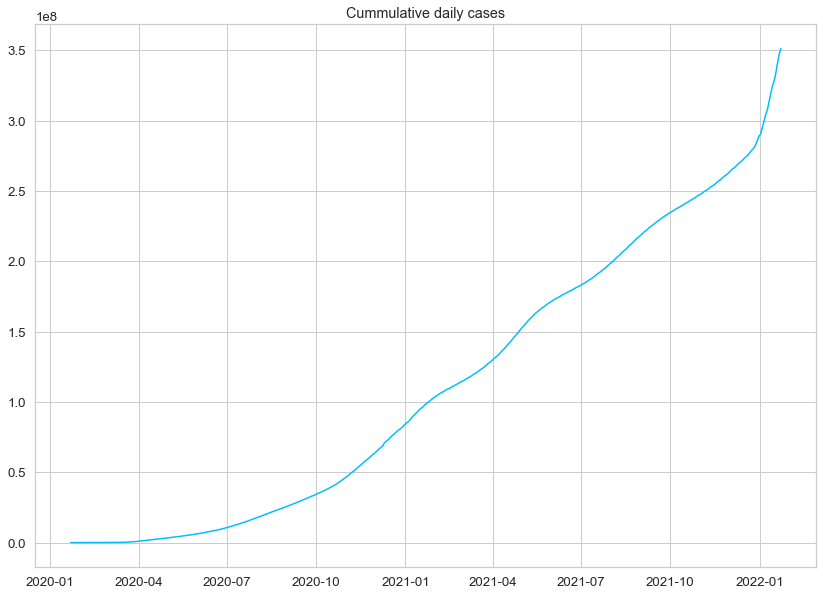

In [20]:
import matplotlib.pyplot as plt 
plt.plot(daily_cases)
plt.title('Cummulative daily cases')

In [23]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html
daily_cases = daily_cases.diff().fillna(daily_cases[0]).astype(np.int64)

In [22]:
daily_cases

2020-01-22        557
2020-01-23         98
2020-01-24        286
2020-01-25        493
2020-01-26        684
               ...   
2022-01-19    4232499
2022-01-20    3579405
2022-01-21    3882501
2022-01-22    2670248
2022-01-23    2243563
Length: 733, dtype: int64

Text(0.5, 1.0, 'Daily Cases')

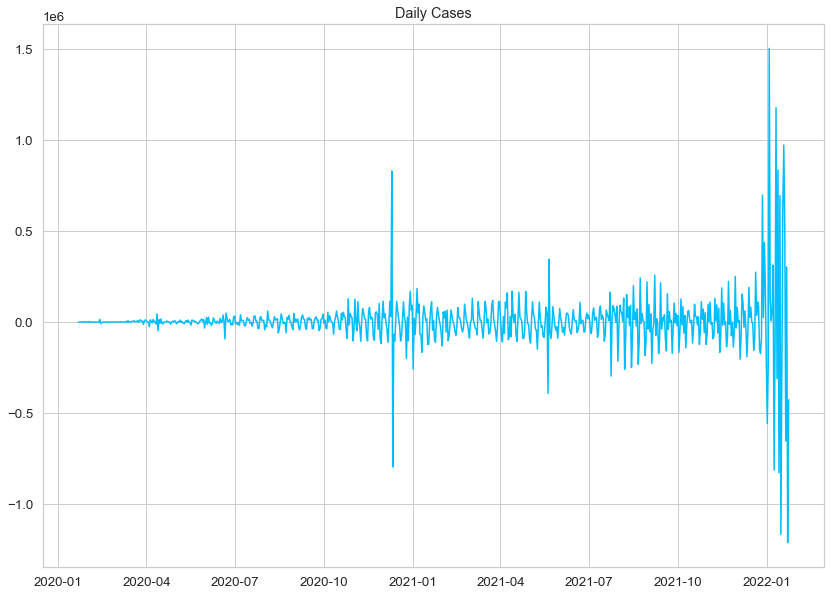

In [24]:
plt.plot(daily_cases)
plt.title('Daily Cases')

In [25]:
daily_cases.shape

(733,)

In [30]:
test_data_size = 14
train_data = daily_cases[:-test_data_size]
test_data = daily_cases[-test_data_size:]

In [31]:
train_data.shape[0], test_data.shape[0]

(719, 14)

In [32]:
scaler = MinMaxScaler()
scaler = scaler.fit(np.expand_dims(train_data, axis=1))
train_data = scaler.transform(np.expand_dims(train_data, axis=1))
test_data = scaler.transform(np.expand_dims(test_data, axis=1))

In [35]:
train_data.shape, test_data.shape

((719, 1), (14, 1))